# Predicting Newsletter Subscription in Minecraft Players

## I. Introduction:

### Background
The study of player engagement and behaviour in games such as Minecraft is a growing field in data science. With online gaming becoming more popular than ever, many groups of individuals and researchers want to see what variables show how intrigued and connected players are to a certain game. In this project, I will be working with a research group at the University of British Columbia led by Dr. Frank Wood, which is investigating the behaviours and activities of players in a custom Minecraft game server. They collected each player’s activity over time, which allowed them to study their behaviour, preferences, and play patterns.

### Question
The aim of this project is to answer the following question:
"Can characteristics of a player predict whether they will subscribe to the game-related newsletter?"
This question is quite interesting as it can help identify the types of players who are most likely to show more engagement and interest in the project. The researchers have a goal of increasing their recruitment efforts, and this is certainly one way of gathering players who have more long-term interest, which will help prioritize players for future studies.

### Data Description
To answer this question, this project will use two datasets:

* `players.csv`: Contains demographic and behavioural features of individual players, such as age, gender, and whether they are subscribed to a newsletter.
* `sessions.csv`: Contains a record of each game session for each player, whcih includes timestamps and session length.

While quite informative, it’s not easy to use two datasets when trying to analyze data. This needs to be taken care of. Also, the sessions.csv dataset doesn’t really give that useful information other than when the player logged in and logged out. However, this can be wrangled to make it more useful. On the other hand, both of the data sets contain a variable called hashedEmail. This variable will not be useful in the building and testing of the actual models, but will be very important in combining the data based on each player, since each player has their own hashedEmail attached to them. 

In this project, these datasets will be wrangled and used to construct meaningful visuals and relationships related to player behaviour and characteristics to identify which features are most predictive of subscribing to a newsletter.



## II. Methods and Results:

### Reading and Loading the Data
First, let's load the libraries needed for wrangling the data and creating our models, such as `tidyverse`. Then, let’s read both of the datasets using the function `read_csv` and assign them to an object. Since these datasets are quite big, we can use the function `head` to get the first few rows to see what we are working with.

In [1]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(repr)
library(rsample)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymo

In [2]:
players_data <- read_csv("data/players.csv")
head(players_data)
sessions_data <- read_csv("data/sessions.csv")
head(sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Wrangling and Cleaning

Now that we have read our data, it is now time to clean and wrangle it to make it easier to analyze. Working with two datasets is tough, so let’s first join them together. Combining the datasets will make inputting the data argument into a function or pipe operator much easier as there is only one to pull data from. 

Next, notice how there are many counts of a single player, so it’s best that the data is grouped by player characteristics like gender, age, experience level, subscription status, and played hours so each player has their own observation (row).  

To further wrangle, the start/end times are not really helping much as the hours played are already given, so they can be removed. Also, as the original dataset had multiple observations for a single player, I can use that to make a new column to show how many times the player logged into play Minecraft. This can be done using the count function in summarize to see how many times each player joined the game and created a summary table with one row for each group of players. This made the data much simpler.

In [3]:
combined_data <- inner_join(players_data, sessions_data, by = "hashedEmail")

combined_summary <- combined_data |>
  group_by(name, gender, Age, hashedEmail, experience, subscribe, played_hours) |>
  summarise(session_count = n(), .groups = "drop")

final_data <- combined_summary |>
    select(!hashedEmail & !name)

head(final_data)

gender,Age,experience,subscribe,played_hours,session_count
<chr>,<dbl>,<chr>,<lgl>,<dbl>,<int>
Prefer not to say,17,Beginner,TRUE,0.2,1
Non-binary,17,Amateur,TRUE,1.2,2
Other,NA,Pro,TRUE,0.2,1
Prefer not to say,25,Veteran,FALSE,1.4,6
Non-binary,20,Regular,TRUE,218.1,95
Male,17,Amateur,TRUE,53.9,130


### Creating Visualizations

Looking at the dataset final_data, it is now much cleaner and easier to work with, making it ready for further analysis. With this cleaned dataset, visualizations can be created using the library `ggplot2` and the function `ggplot` to explore relationships between variables, which will help to see which variables would make good predictors for classifying newsletter subscription status. 


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


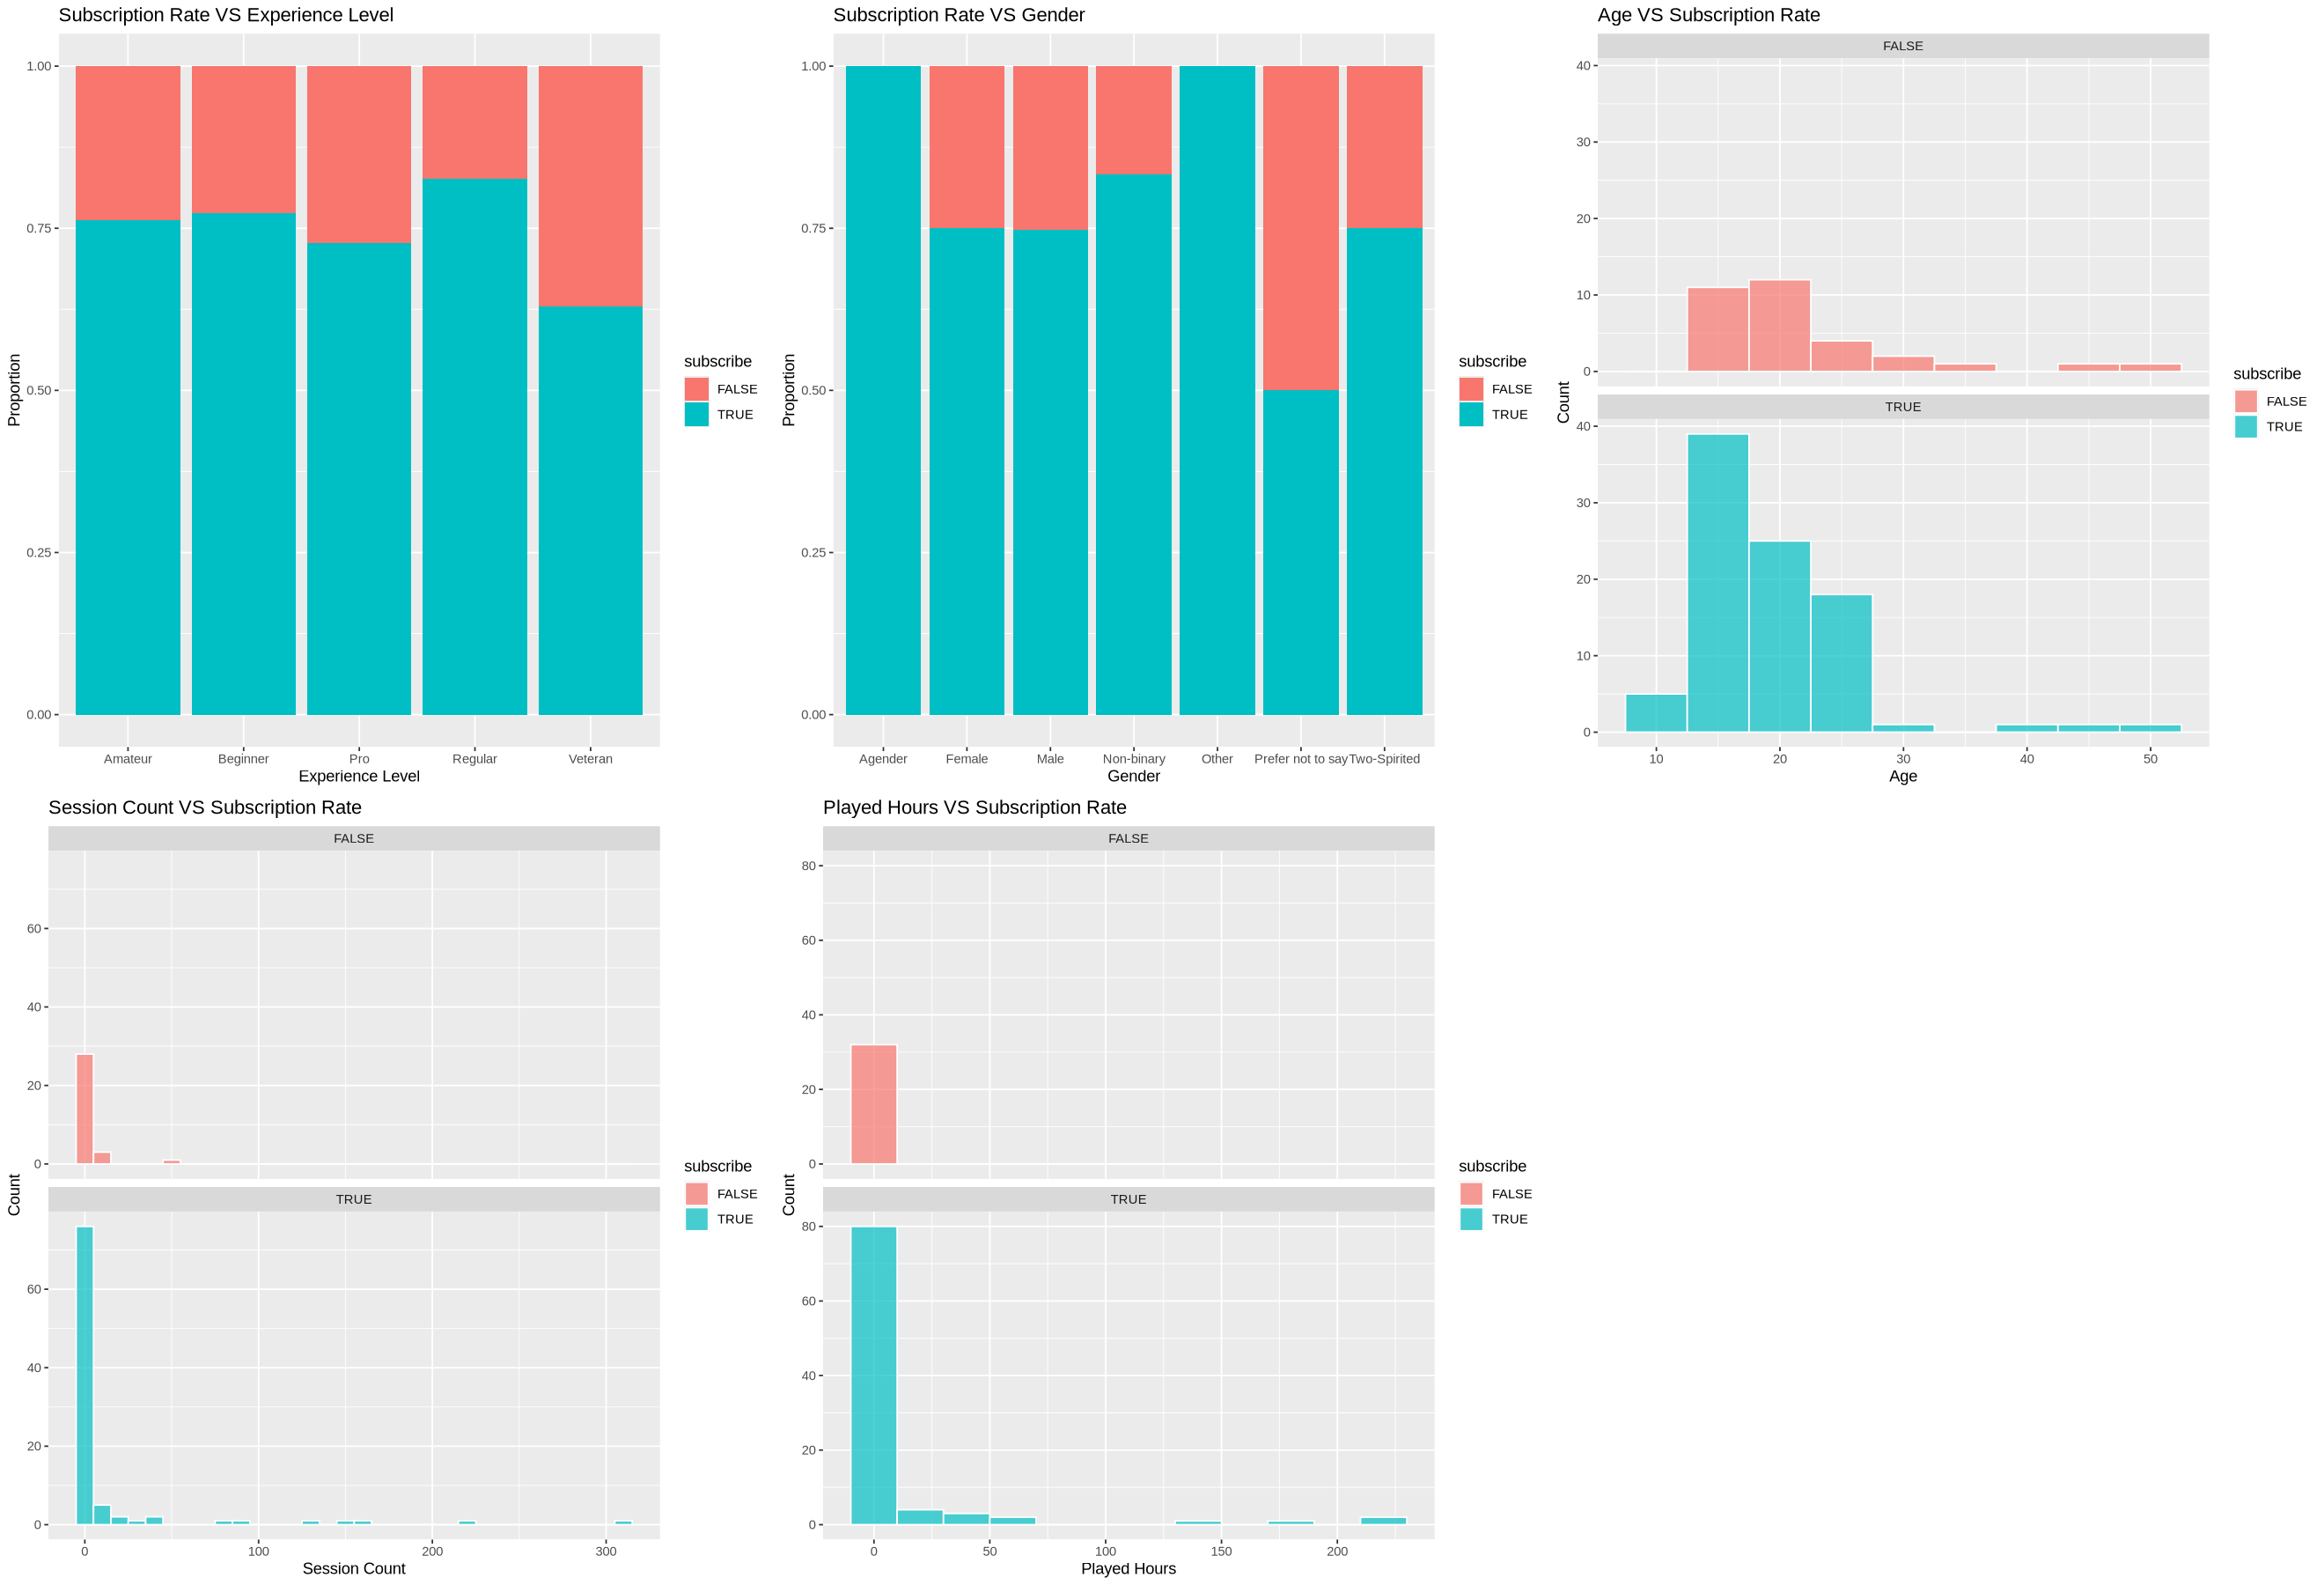

In [4]:
LevelVSProp <- ggplot(final_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate VS Experience Level", x = "Experience Level", y = "Proportion")

GenderVSProp <- ggplot(final_data, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "fill") + 
  labs(title = "Subscription Rate VS Gender", x = "Gender", y = "Proportion")

AgeVSCount <- ggplot(final_data, aes(x = Age, fill = subscribe)) +
  geom_histogram(binwidth = 5, color = "white", position = "identity", alpha = 0.7) +
  facet_wrap(~ subscribe, ncol = 1) + 
  labs(title = "Age VS Subscription Rate", x = "Age", y = "Count")

SessionVSCount <- ggplot(final_data, aes(x = session_count, fill = subscribe)) +
  geom_histogram(binwidth = 10, color = "white", position = "identity", alpha = 0.7) +
  facet_wrap(~ subscribe, ncol = 1) + 
  labs(title = "Session Count VS Subscription Rate", x = "Session Count", y = "Count")

HoursVsCount <- ggplot(final_data, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(binwidth = 20, color = "white", position = "identity", alpha = 0.7) + 
  facet_wrap(~ subscribe, ncol = 1) +
  labs(title = "Played Hours VS Subscription Rate", x = "Played Hours", y = "Count")

library(gridExtra)
options(repr.plot.width = 22, repr.plot.height = 15)
grid.arrange(LevelVSProp, GenderVSProp, AgeVSCount, SessionVSCount, HoursVsCount, ncol = 3)

### Analyzing Visualizations

Now that we have some visualizations, we can make predictions to see which predictors would make the most accurate model.

Subscription Rate VS Experience Level:
- This bar plot shows the relationship between a player’s experience playing Minecraft and whether they have subscribed to the newsletter. This is quite helpful as it shows clearly which type of players are most likely to subscribe to the newsletter, making it a possible predictor for the model.

Subscription Rate VS Gender:
- This bar plot shows the relationship between the gender of the player and whether they have subscribed to the newsletter. While this plot seems helpful as it shows which gender is most likely to subscribe to the newsletter, there is a stat that may hinder it from not being a good predictor. Let’s take a look at the tibble below showing the count for each gender.

In [5]:
gender_count <- final_data |>
    group_by(gender) |>
    summarize(count = n())
gender_count

gender,count
<chr>,<int>
Agender,1
Female,24
Male,83
Non-binary,6
Other,1
Prefer not to say,6
Two-Spirited,4


The genders "Other" and "Agender" only have one player respectfully, and the plot is showing that 100% of Other and Agender individuals subscribe to the newsletter. With there only being one individual in the data for each of the two, this is not a representative statistic, so this cannot be used as a predictor for the model. 

Age VS Subscription Rate:
- This histogram shows the distribution of age of the players in the dataset, also showing if they are subscribed or not to the newsletter. This looks like a good predictor; it shows that teenagers are most likely to subscribe to the newsletter.

Session Count VS Subscription Rate + Played Hours VS Subscription Rate:
- These two histograms are combined because they show similar results. A majority of the players in the dataset did not even play the game, which makes it difficult to predict if they would subscribe to the newsletter.

From analyzing the plots, let’s choose experience and age as our predictors. Let’s see if these will output the best accuracy.

### Data Analysis

Now that we have the predictors chosen, we can start our data analysis. Two models will be made, one using all of the variables as predictors, and one with the variables chosen: Age and Experience. Let’s first start with the all variable model.

First, let’s make sure our categorical variable is a factor. Then, it’s important to split the data. The original dataset was split into 75% training and 25% testing. The training set will allow us to create and train the model, while the testing will allow us to test the model and predict values. Splitting the data will make sure the model is unbiased and will not overfit. 

In [6]:
final_data <- final_data |>
    mutate(subscribe = as.factor(subscribe))

In [7]:
set.seed(123)

data_split <- initial_split(final_data, prop = 0.75, strata = subscribe)
train_data <- training(data_split)
test_data <- testing(data_split)

Next, let's create the recipe to let the model know what categorical variable we are trying to predict using which variables as predictors. Basically, it gives each variable a role in the model.

In [8]:
newsletter_recipe <- recipe(subscribe ~ Age + experience + played_hours + session_count, gender, data = train_data) 

Now it’s time to make the model. A K-Nearest Neighbors classification model will be used to predict whether a user will subscribe to the newsletter. This type of model is used for classification problems to predict categorical variables, in this case, newsletter subscription status. It is intuitive, easy to use, and works well when the data is not linear. Since the goal of the model is to classify a newsletter subscription status based on player stats, KNN is a good choice.

There are some limitations though. KNN is not very interpretable. This is different from linear regression, as KNN does not really explain why a prediction is made. Also, it can get slow when using larger datasets. This should not be a problem though as wrangling the data made the Minecraft player dataset much smaller and easier to work with.

Cross-validation will be used. Specifically, 5-fold cross-validation to split the training data into 5 chunks. 

First, we need to set the neighbors argument to tune() since we first want to see what the best K value will be for the model. 

In [9]:
knn_model <-
  nearest_neighbor(neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

data_folds <- vfold_cv(train_data, v = 5, strata = subscribe)

Now let’s add the model and recipe to workflow, bundling together all of the preprocessing steps. Next, a tibble was created, which gives a range of K values that the `tune_grid()` function can try out to see which one gives the best accuracy. In this case, it will test K values from 1 to 20, going up by 1s. Lastly, the `collect_metrics()` gathers the performance metrics of the model, which is then wrangled to output the best K value, the one that has the best accuracy.

Note: An error pops up when running the code, but that error does not affect the result

In [10]:
knn_workflow <- workflow() |>
  add_recipe(newsletter_recipe) |>
  add_model(knn_model)

knn_grid <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_tune_results <- knn_workflow |>
  tune_grid(resamples = data_folds, grid = knn_grid) |>
    collect_metrics()

accuracy_results <- knn_tune_results |>
    select(.metric, neighbors, mean) |>
    filter(.metric == "accuracy") |>
    slice_max(mean, n = 1)
accuracy_results


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 18 rows.
               ✖ Assigned data has 19 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 19 to size 18.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





.metric,neighbors,mean
<chr>,<dbl>,<dbl>
accuracy,11,0.6934985
accuracy,12,0.6934985
accuracy,13,0.6934985
accuracy,14,0.6934985
accuracy,15,0.6934985
accuracy,16,0.6934985
accuracy,19,0.6934985
accuracy,20,0.6934985


The tibble above shows that the K values 11-20 give the same accuracy of 0.6934985. Let’s choose K = 11 to avoid underfitting the data and keep our model simple. Now we can make our final model with the neighbors argument being 11. The model can be fit and then be used to predict the newsletter status in the testing dataset. After predicting, we can use `metrics()` to give us a table of performance metrics comparing the actual newsletter subscription status VS the predicted and filter out the accuracy.


In [11]:
set.seed(123)

knn_model_final <- nearest_neighbor(neighbors = 11) |>
  set_engine("kknn") |>
  set_mode("classification")

newsletter_recipe_final <- recipe(subscribe ~ Age + experience + played_hours + session_count, gender, data = train_data) 

knn_workflow_final <- workflow() |>
    add_recipe(newsletter_recipe_final) |>
    add_model(knn_model_final)

knn_fit_final <- knn_workflow_final |>
    fit(data = train_data)

test_data_predictions_1 <- predict(knn_fit_final, test_data) |>
  bind_cols(test_data)

test_data_predictions_1 |> metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6875


Finally, the model is done. Using all of the predictors given in the dataset, this model can predict a user's newsletter subscription status to an accuracy of 0.6875. Before we discuss the results, lets repeat all of the steps, but this time to create a model with the predictors we chose, Experience and Age.

Note: An error pops up when running the code, but that error does not affect the result

In [12]:
set.seed(123)

final_data <- final_data |>
    mutate(subscribe = as.factor(subscribe))

data_split_2 <- initial_split(final_data, prop = 0.75, strata = subscribe)
train_data_2 <- training(data_split_2)
test_data_2 <- testing(data_split_2)

newsletter_recipe_2 <- recipe(subscribe ~ Age + experience, data = train_data_2) 

knn_model_2 <-
  nearest_neighbor(neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

data_folds <- vfold_cv(train_data_2, v = 5, strata = subscribe)

knn_workflow_2 <-
  workflow() |>
  add_recipe(newsletter_recipe_2) |>
  add_model(knn_model_2)

knn_grid <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_tune_results_2 <-
  knn_workflow_2 |>
  tune_grid(resamples = data_folds, grid = knn_grid) |>
    collect_metrics()

accuracy_results_2 <- knn_tune_results_2 |>
    select(.metric, neighbors, mean) |>
    filter(.metric == "accuracy") |>
    slice_max(mean, n = 1)
accuracy_results_2

knn_model_final_2 <- nearest_neighbor(neighbors = 19) |>
  set_engine("kknn") |>
  set_mode("classification")

newsletter_recipe_2_final <- recipe(subscribe ~ Age + experience, data = train_data_2) 

knn_workflow_final_2 <- workflow() |>
    add_recipe(newsletter_recipe_2_final) |>
    add_model(knn_model_final_2)

knn_fit_final_2 <- knn_workflow_final_2 |>
    fit(data = train_data_2)

test_data_predictions_2 <- predict(knn_fit_final_2, test_data_2) |>
  bind_cols(test_data_2)

test_data_predictions_2 |>
    metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 18 rows.
               ✖ Assigned data has 19 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 19 to size 18.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





.metric,neighbors,mean
<chr>,<dbl>,<dbl>
accuracy,19,0.7285862
accuracy,20,0.7285862


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.71875


To see the difference in the accuracy of the two models, let's create a bar plot:

Model,Accuracy
<chr>,<dbl>
All Predictors Model,0.68750
Selected Predictors Model,0.71875


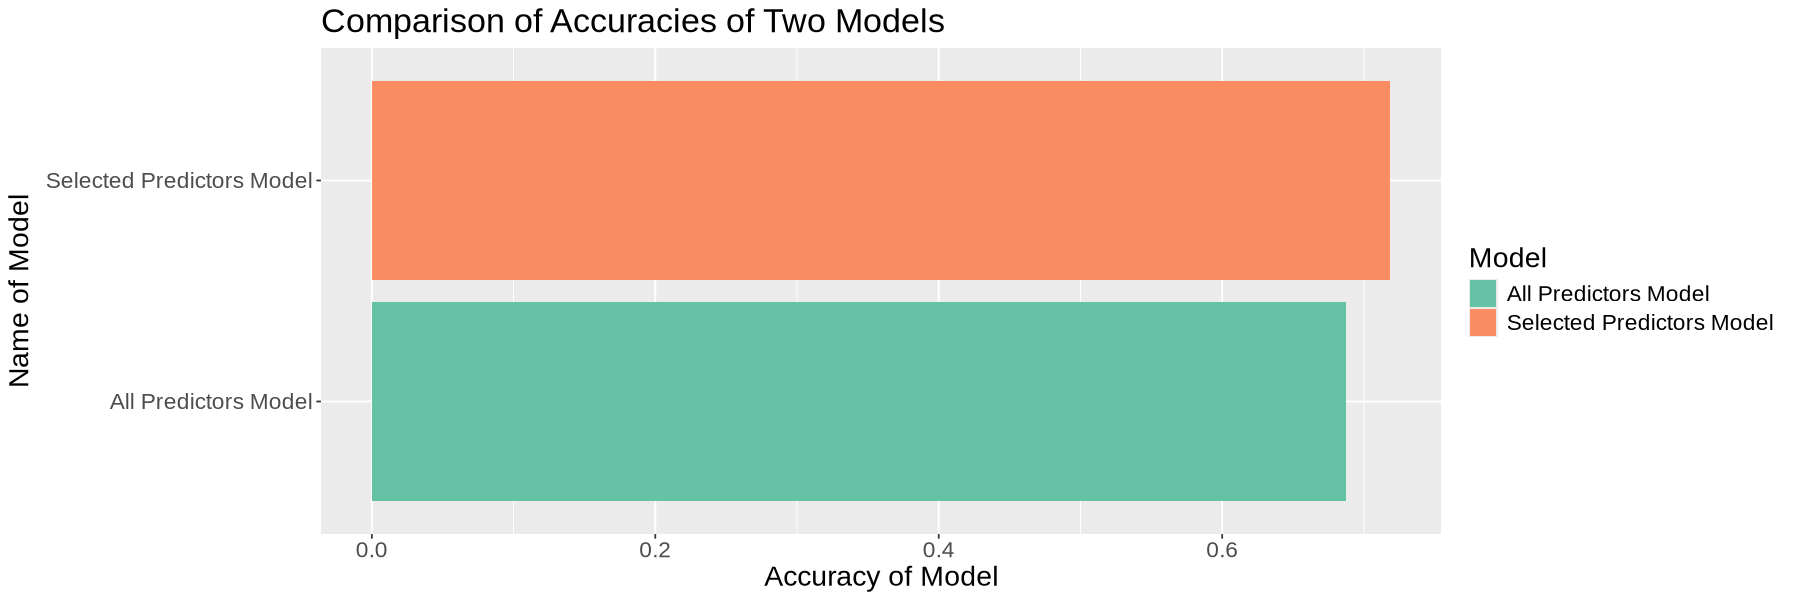

In [13]:
model1_accuracy <- 0.6875
model2_accuracy <- 0.71875

model_accuracies_for_plot <- tibble(
  Model = c("All Predictors Model", "Selected Predictors Model"), 
  Accuracy = c(model1_accuracy, model2_accuracy))
model_accuracies_for_plot

options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(model_accuracies_for_plot, aes(x = Accuracy, y = Model, fill = Model)) +
    geom_bar(stat = "identity") +
    labs(title = "Comparison of Accuracies of Two Models", x = "Accuracy of Model", y = "Name of Model") +
    theme(text = element_text(size = 17)) +
    scale_fill_brewer(palette = "Set2")

## III. Discussion

In this data analysis, two KNN classification models were made for predicting newsletter subscription. One of the models used all of the variables as predictors (Age, Experience, Played_hours, Session_count, and Gender) and the other one used the variables chosen by visualizing them (Age, Experience). The model using all variables as predictors had an accuracy of 0.6875, while the model using Age and Experience as predictors had an accuracy of 0.71875. The second model performed better in terms of accuracy. Now we can answer the question: 

Can characteristics of a player predict whether they will subscribe to the game-related newsletter?

From the models, we can conclude that player experience and age are most predictive in determining if a player will subscribe to a game-related newsletter. These findings can lead to several impacts. For the team's recruitment efforts, these results can refine their marketing and outreach strategies. Instead of trying to market to general and broad audiences, they can focus on specific demographics like the age of the player and how much experience they have playing the game. In addition, knowing the demographics of newsletter subscribers, the team can tailor their newsletter to show content that is more in line with their audience's interests. This can include content such as tips and tricks for more experienced players, or certain in-game challenges that can be competed for. 

These findings are not just relevant now, but they can be applied to research in the future. For example, instead of using Minecraft as the game of choice, researchers can explore other games with different genres. Furthermore, researchers can try to collect other game statistics such as the time spent or total count on specific modes in the game. Examples from Minecraft include Survival and/or Creative mode, as well as if the player plays in single or multiplayer. 